In [1]:
import sklearn.datasets as skd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, log_loss, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.linear_model import SGDClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

## 1. Cargar el dataset

In [ ]:
cancer = skd.load_breast_cancer()
X = cancer.data
y = cancer.target

### 1.1 Nombres de las características

`Para una mejor visualización creo un dataframe (name_f) para ver los nombres de las características del dataset`

In [3]:
num_cols = cancer.data.shape[1]
name_f = pd.DataFrame(cancer.feature_names, index=range(1, num_cols + 1), columns=["Característica"])
name_f

,Característica
1,mean radius
2,mean texture
3,mean perimeter
4,mean area
5,mean smoothness
6,mean compactness
7,mean concavity
8,mean concave points
9,mean symmetry
10,mean fractal dimension


### 1.2 Nombres de las clase objetivo

`Para una mejor visualización creo un dataframe (name_t) para ver los nombres de las variables objetivo del dataset`

In [4]:
name_t = pd.DataFrame(cancer.target_names, columns=["Tipo"])
name_t

,Tipo
0,malignant
1,benign


In [5]:
data = pd.DataFrame(X, columns=cancer.feature_names)
data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [6]:
X = add_constant(X)  # Agregar una constante para el intercepto

## 2. Extracción de columnas para la matriz de correlación

`Como he agregado una columnas llamada bias al dataframe, tengo que eliminarla para un nuevo dataframe (datacorr) que crearé para obtener la matriz de correlación. Esta matriz debe contener únicamente los datos de las variables, de ahí que no deba estar presente la columna bías`

In [7]:
newcols = [col for col in data.columns if col != "cancer_target"]
datacorr = pd.DataFrame(data[newcols])
datacorr.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


### 2.1 Creación de la Matriz de Correlación de características

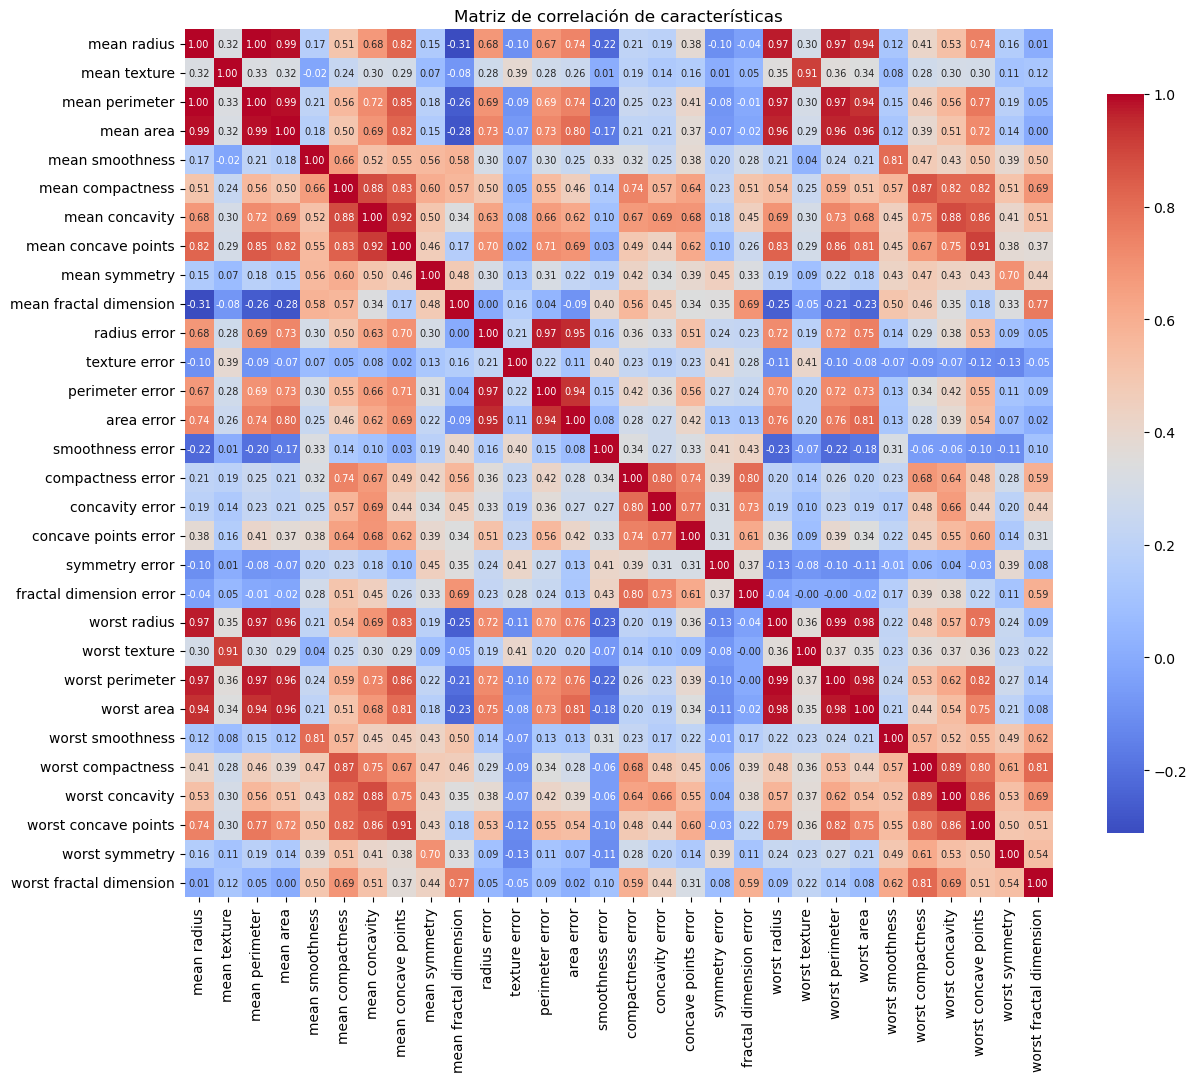

In [8]:
plt.figure(figsize=(14,12))
sns.heatmap(datacorr.corr(), annot=True, annot_kws={"size":7}, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .8})
plt.title("Matriz de correlación de características")
plt.show()

## 3. Dividir en conjuntos en entrenamiento y test

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

## 4. Escalar características

In [10]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

## 5. Entrenar el modelo de regresión logística

In [11]:
model = LogisticRegression(
    solver='lbfgs',
    max_iter=100,
    verbose=1,
    tol=1e-6,
    random_state=42)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,1e-06
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


### R2

In [12]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9868131868131869
0.9824561403508771


### 6. Gráfica de pérdida

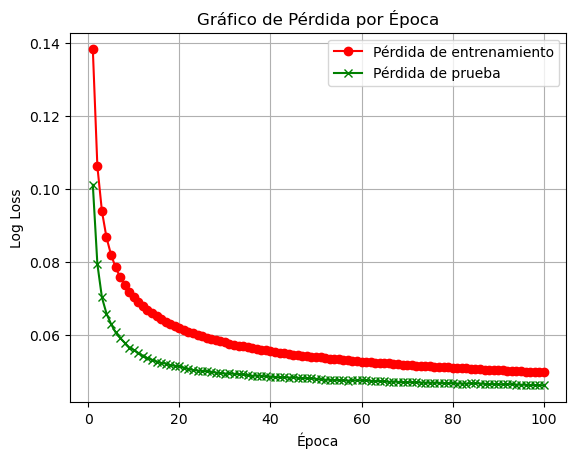

In [13]:
# Inicializar modelo con entrenamiento por lotes
model = SGDClassifier(loss='log_loss', max_iter=1, learning_rate='constant', eta0=0.01, warm_start=True)

losses_train = []
losses_test = []
epochs = 100

# Entrenamiento manual por épocas
for epoch in range(epochs):
    model.partial_fit(X_train, y_train, classes=np.unique(y))
    y_proba = model.predict_proba(X_train)
    current_loss = log_loss(y_train, y_proba)
    losses_train.append(current_loss)

    model.partial_fit(X_test, y_test, classes=np.unique(y))
    y_proba_test = model.predict_proba(X_test)
    current_loss_test = log_loss(y_test, y_proba_test)
    losses_test.append(current_loss_test)

# Graficar pérdida
plt.plot(range(1, epochs + 1), losses_train, marker='o', color='red')
plt.plot(range(1, epochs + 1), losses_test, marker='x', color='green')
plt.xlabel('Época')
plt.ylabel('Log Loss')
plt.title('Gráfico de Pérdida por Época')
plt.grid(True)
plt.legend(['Pérdida de entrenamiento', 'Pérdida de prueba'])
plt.show()


### 6.1 Coeficientes del modelo

`Para una mejor visualización de los coeficientes del modelo creo un dataframe (coefs)`

In [14]:
coefs = pd.DataFrame(model.coef_[0], index=['bias'] + list(data.columns), columns=["Coeficientes"])
coefs

,Coeficientes
bias,0.000000
mean radius,-0.424001
mean texture,-0.459716
mean perimeter,-0.395405
mean area,-0.512348
mean smoothness,-0.164458
mean compactness,0.722627
mean concavity,-1.091198
mean concave points,-1.173600
mean symmetry,0.263908


## 7. Realizar predicciones con el conjunto de test

In [15]:
y_pred = model.predict(X_test)

`Para una mejor visualización de las predicciones del modelo creo un dataframe (pred). Solo se muestran algunas, no es necesario mostrar todas, para eso están las métricas. Aunque la extension DataWrangler me permite navegar por todas con paginación`

In [16]:
pred = pd.DataFrame({'Real': y_test, 'Predicción': y_pred})
pred

,Real,Predicción
0,1,1
1,0,0
2,0,0
3,1,1
4,1,1
...,...,...
109,1,1
110,0,0
111,1,1
112,1,1


`Una fila no se clasificó correctamente`

In [17]:
pred = pred[pred['Real'] != pred['Predicción']]
pred

,Real,Predicción
20,0,1


## 8. Evaluar el modelo con distintas métricas

### 8.1 Calcular la Matriz de Confusión del modelo

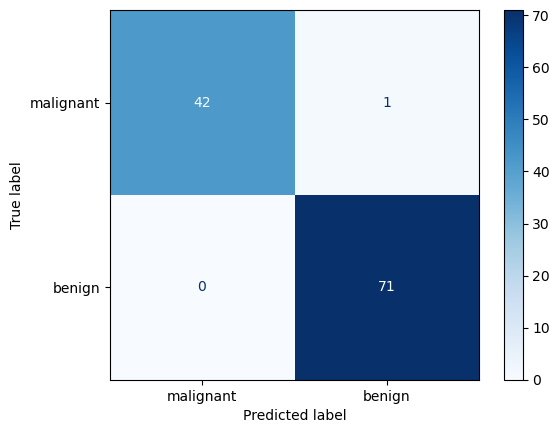

In [18]:
conf_matrix = confusion_matrix(y_test, y_pred)  
conf_matrix_vis = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=cancer.target_names)
conf_matrix_vis.plot(cmap=plt.cm.Blues, values_format='d')
plt.show()

### 8.2 Calcular la exactitud (accuracy) del modelo

In [19]:
accuracy = accuracy_score(y_test, y_pred) 
accuracy *= 100 
print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 99.12%


### 8.3 Calcular la precisión del modelo (Precision)

In [20]:
precision = precision_score(y_test, y_pred)
precision *= 100
print(f"Precision: {precision:.2f}%")

Precision: 98.61%


### 8.4 Resumen de métricas

In [21]:
report = classification_report(y_test, y_pred, target_names=cancer.target_names, digits=4)
print(report)

              precision    recall  f1-score   support

   malignant     1.0000    0.9767    0.9882        43
      benign     0.9861    1.0000    0.9930        71

    accuracy                         0.9912       114
   macro avg     0.9931    0.9884    0.9906       114
weighted avg     0.9913    0.9912    0.9912       114

